In [30]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import sklearn as sk
import numpy as np

In [31]:
df = pd.read_csv("Data/ocRecords.csv")
df

,Unnamed: 0,Price,Property Type,City,County,year,month,day,outcode,time_const,price_mult
0,0,25000,T,OLDHAM,GREATER MANCHESTER,1995,8,18,OL1,728433,3.125000e+07
1,1,42500,S,GRAYS,THURROCK,1995,8,9,RM17,728424,1.535312e+08
2,2,45000,T,HIGHBRIDGE,SOMERSET,1995,6,30,TA9,728385,1.822500e+08
3,3,43150,T,BEDFORD,BEDFORDSHIRE,1995,11,24,WN7,728529,1.606839e+08
4,4,18899,S,WAKEFIELD,WEST YORKSHIRE,1995,6,23,LS99,728378,1.350039e+07
...,...,...,...,...,...,...,...,...,...,...,...
17613576,22489340,175000,D,HEBDEN BRIDGE,WEST YORKSHIRE,2017,3,22,HX7,736317,1.071875e+10
17613577,22489341,85000,T,LEEDS,WEST YORKSHIRE,2017,2,27,LS99,736292,1.228250e+09
17613578,22489343,175000,S,LEEDS,WEST YORKSHIRE,2017,2,20,LS99,736285,1.071875e+10
17613579,22489344,586945,D,WETHERBY,WEST YORKSHIRE,2017,2,15,LS22,736280,4.044103e+11


In [32]:
# Data
import pandas as pd
import numpy as np
from sklearn import datasets
import pickle

# Standardizing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models and eval
import math
import sklearn.metrics
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
from sklearn.model_selection import train_test_split

# Hyperparameter tuning
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK

In [33]:
scl = StandardScaler()
enc = LabelEncoder()

Y = df["Price"]
X = df[["year", "month", "day", "time_const"]]

X["outcode"] = enc.fit_transform(df["outcode"])
pickle.dump(enc, open("pickleDumps/outcode_encoder.sav", "wb"))

X["Property Type"] = enc.fit_transform(df["Property Type"])
pickle.dump(enc, open("pickleDumps/type_encoder.sav", "wb"))

C:\Users\camer\AppData\Local\Temp\ipykernel_1360\4043700709.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["outcode"] = enc.fit_transform(df["outcode"])
C:\Users\camer\AppData\Local\Temp\ipykernel_1360\4043700709.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Property Type"] = enc.fit_transform(df["Property Type"])


In [34]:
X

,year,month,day,time_const,price_mult,outcode,Property Type
0,1995,8,18,728433,3.125000e+07,644,4
1,1995,8,9,728424,1.535312e+08,767,3
2,1995,6,30,728385,1.822500e+08,923,4
3,1995,11,24,728529,1.606839e+08,1036,4
4,1995,6,23,728378,1.350039e+07,553,3
...,...,...,...,...,...,...,...
17613576,2017,3,22,736317,1.071875e+10,396,0
17613577,2017,2,27,736292,1.228250e+09,553,4
17613578,2017,2,20,736285,1.071875e+10,553,3
17613579,2017,2,15,736280,4.044103e+11,549,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(y_train))
print()
print(len(X_test))
print(len(y_test))

14090864
14090864

3522717
3522717


In [36]:
xgboost = XGBRegressor()
xgboost.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [37]:
# rf = RandomForestRegressor().fit(X_train, y_train)
    
# rf_p = rf.predict(X_test)

# mae = sklearn.metrics.mean_absolute_error(y_test, rf_p)
# print(mae)

# for i in range(10):
#     print(str(i) + "| Actual: " + str(y_test.iloc[i]) + " | Predicted: " + str(rf_p[i]))

In [38]:
lgbm_train = lgbm.Dataset(X_train, y_train)
lgbm_test = lgbm.Dataset(X_test, y_test, reference=lgbm_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8
}

lgbm_reg = lgbm.train(params,
                lgbm_train,
                num_boost_round=50,
                valid_sets=lgbm_test)

y_pred = lgbm_reg.predict(X_test, num_iteration=lgbm_reg.best_iteration)

mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)

print(mae)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 14090864, number of used features: 7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 171892.263109
[1]	valid_0's rmse: 313148	valid_0's l1: 100081
[2]	valid_0's rmse: 305158	valid_0's l1: 95238.4
[3]	valid_0's rmse: 297669	valid_0's l1: 90623.7
[4]	valid_0's rmse: 290915	valid_0's l1: 86249.5
[5]	valid_0's rmse: 284573	valid_0's l1: 82050.8
[6]	valid_0's rmse: 278809	valid_0's l1: 78038.5
[7]	valid_0's rmse: 273535	valid_0's l1: 74289.4
[8]	valid_0's rmse: 268643	valid_0's l1: 70732.1
[9]	valid_0's rmse: 263946	valid_0

In [39]:
xgbr = XGBRegressor().fit(X_train, y_train)
    
xgbr_p = xgbr.predict(X_test)

mae = sklearn.metrics.mean_absolute_error(y_test, xgbr_p)
print(mae)

for i in range(10):
    print(str(i) + "| Actual: " + str(y_test.iloc[i]) + " | Predicted: " + str(xgbr_p[i]))

5939.266894093901
0| Actual: 49950 | Predicted: 49618.58
1| Actual: 163000 | Predicted: 163543.33
2| Actual: 79000 | Predicted: 79369.5
3| Actual: 65000 | Predicted: 64933.117
4| Actual: 389000 | Predicted: 383358.9
5| Actual: 200000 | Predicted: 200777.12
6| Actual: 165000 | Predicted: 165259.23
7| Actual: 56000 | Predicted: 56498.23
8| Actual: 399000 | Predicted: 392752.2
9| Actual: 230000 | Predicted: 230152.28


In [40]:
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001 ,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', [3, 6, 9, 12, 15, 18, 21]), 
    'gamma' : hp.choice('gamma', [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]),
    'colsample_bytree' : hp.choice('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),     
    'reg_alpha' : hp.choice('reg_alpha', [0.001, 0.01, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [0.001, 0.01, 0.1, 1, 10, 100])
}

In [41]:
mae_trials = []
rmse_trials = []

def objective(space):
    # Define model with search space
    model = XGBRegressor(seed=0, **space)
            
    #Fit the model.
    model.fit(X_train, y_train, verbose=False)

    #Calculate prediction, mae and rmse.
    pred = model.predict(X_test)
    mae = sklearn.metrics.mean_absolute_error(y_test, pred)
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_test, pred))

    # Print metrics
    print ("RMSE: {:.2f}".format(rmse) + " | MAE: {:.2f}".format(mae))

    # Append metrics to lists
    mae_trials.append(mae)
    rmse_trials.append(rmse)
    
    #Specify loss to minimise.
    return {'loss':mae, 'status': STATUS_OK, 'model': model}

In [42]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30,
            trials=trials)

print(best)

RMSE: 357217.37 | MAE: 170001.17                      
RMSE: 338594.75 | MAE: 155360.87                                                   
RMSE: 284028.57 | MAE: 67704.32                                                    
RMSE: 260666.52 | MAE: 64202.49                                                    
RMSE: 271836.84 | MAE: 16155.77                                                   
RMSE: 357395.24 | MAE: 170000.83                                                   
RMSE: 224014.03 | MAE: 9445.46                                                     
RMSE: 346708.00 | MAE: 155389.71                                                  
RMSE: 357328.74 | MAE: 170002.54                                                  
RMSE: 357613.11 | MAE: 170000.99                                                  
RMSE: 283386.88 | MAE: 67467.36                                                  
RMSE: 235008.81 | MAE: 13882.35                                                  
RMSE: 357647.64 | MAE: 170001

KeyboardInterrupt: 

In [ ]:
print(mae_trials)
print(rmse_trials)

[68789.35777137596, 68789.06532003803, 80763.06892506311, 149185.6646488601, 149170.4695425887, 163185.23193460552, 149149.92484252638, 72058.597719384, 163182.7757307402, 69192.48230522242, 73818.76498685424, 59749.571746473244, 56224.175204041116, 163182.4047075472, 74846.40663241589, 163187.80462108372, 163182.1673470765, 56015.32951535436, 61180.149141920476, 163182.64620738564, 55989.46023709909, 56016.49547454997, 58122.82557169406, 58387.4105984381, 56865.5619610859, 55282.11910753682, 55282.140397563846, 55282.140397563846, 56137.59990127578, 54317.992009900925]
[245042.09461919952, 250399.29916351457, 268672.9805902455, 305736.35067198996, 305933.6389036696, 315493.9216837643, 307734.5083088402, 254676.064994899, 315487.8307558924, 244872.679388197, 260598.45214712885, 274878.1189107345, 241231.53355601756, 315357.02795088995, 266357.5946955835, 315419.1117849524, 315395.93421515933, 239966.74495515245, 246835.84984022842, 315488.4588421431, 239975.78666030813, 239952.07532103

Text(0, 0.5, 'Value')

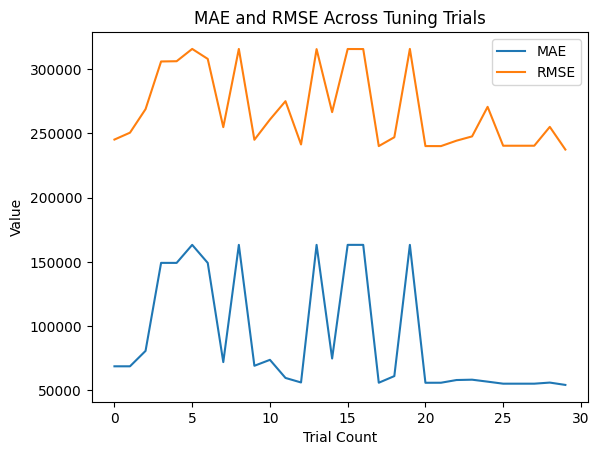

In [ ]:
trials_accuracy = pd.DataFrame()
trials_accuracy["MAE"] = mae_trials
trials_accuracy["RMSE"] = rmse_trials
fig1 = trials_accuracy.plot(kind="line")
fig1.set_title("MAE and RMSE Across Tuning Trials")
fig1.set_xlabel("Trial Count")
fig1.set_ylabel("Value")

In [ ]:
print(best)

{'colsample_bytree': 3, 'gamma': 7, 'learning_rate': 3, 'max_depth': 6, 'reg_alpha': 5, 'reg_lambda': 5}


In [ ]:
# Saving the model

model = XGBRegressor(colsample_bytree=0.6, 
                     gamma=4, 
                     learning_rate=0.1, 
                     max_depth=21, 
                     reg_alpha=100, 
                     reg_lambda=100)

model.fit(X_train, y_train)

filename = "pickleDumps/xgbm_prop_model.sav"

pickle.dump(model, open(filename, "wb"))

In [ ]:
y_pred = model.predict(X_test)
print(sklearn.metrics.mean_absolute_error(y_test, y_pred))
print(math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

54317.992009900925
237278.12618412814
